In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [3]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [5]:
import findspark
findspark.init()

In [29]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.feature import *

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pyspark
from pyspark.sql import SparkSession

In [32]:
spark = SparkSession.builder.appName('Spark RDD').getOrCreate()

In [33]:
sc = spark.sparkContext

In [34]:
testRDD1 = sc.textFile("/content/waterpoint_data_labels.csv")

In [35]:
header = testRDD1.first()
testRDD1 = testRDD1.filter(lambda line: line != header)
print("Total Records without header: ", testRDD1.count())
print("\nFirst Two Records After Removing Header\n")
print(testRDD1.take(2))

Total Records without header:  59400

First Two Records After Removing Header

['69572,functional', '8776,functional']


In [36]:
# Split the data into individual columns
splitRDD1 = testRDD1.map(lambda line: line.split(","))
print("\nFirst Two Records After Split/Parsing\n")
print(splitRDD1.take(2))


First Two Records After Split/Parsing

[['69572', 'functional'], ['8776', 'functional']]


In [39]:
testRDD2 = sc.textFile("/content/waterpoint_data_values.csv")

In [40]:
print("Total Records with header: ", testRDD2.count())
print("\nFirst Two Records Before Removing Header\n")
print(testRDD2.take(2))

Total Records with header:  59401

First Two Records Before Removing Header

['id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group', '69572,6000,2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe']


In [41]:
header2 = testRDD2.first()
testRDD2 = testRDD2.filter(lambda line: line != header2)
print("Total Records without header: ", testRDD2.count())
print("\nFirst Two Records After Removing Header\n")
print(testRDD2.take(2))

Total Records without header:  59400

First Two Records After Removing Header

['69572,6000,2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe', '8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe']


In [42]:
# Split the data into individual columns
splitRDD2 = testRDD2.map(lambda line: line.split(","))
print("\nFirst Two Records After Split/Parsing\n")
print(splitRDD2.take(2))


First Two Records After Split/Parsing

[['69572', '6000', '2011-03-14', 'Roman', '1390', 'Roman', '34.93809275', '-9.85632177', 'none', '0', 'Lake Nyasa', 'Mnyusi B', 'Iringa', '11', '5', 'Ludewa', 'Mundindi', '109', 'True', 'GeoData Consultants Ltd', 'VWC', 'Roman', 'False', '1999', 'gravity', 'gravity', 'gravity', 'vwc', 'user-group', 'pay annually', 'annually', 'soft', 'good', 'enough', 'enough', 'spring', 'spring', 'groundwater', 'communal standpipe', 'communal standpipe'], ['8776', '0', '2013-03-06', 'Grumeti', '1399', 'GRUMETI', '34.6987661', '-2.14746569', 'Zahanati', '0', 'Lake Victoria', 'Nyamara', 'Mara', '20', '2', 'Serengeti', 'Natta', '280', '', 'GeoData Consultants Ltd', 'Other', '', 'True', '2010', 'gravity', 'gravity', 'gravity', 'wug', 'user-group', 'never pay', 'never pay', 'soft', 'good', 'insufficient', 'insufficient', 'rainwater harvesting', 'rainwater harvesting', 'surface', 'communal standpipe', 'communal standpipe']]


In [43]:
SplitDF1 = spark.read.format("csv")\
        .option("header", "true")\
        .option("inferSchema", "true")\
        .load("/content/waterpoint_data_labels.csv")

In [44]:
SplitDF1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)



In [45]:
SplitDF1.show(2)

+-----+------------+
|   id|status_group|
+-----+------------+
|69572|  functional|
| 8776|  functional|
+-----+------------+
only showing top 2 rows



In [46]:
type(SplitDF1)

pyspark.sql.dataframe.DataFrame

In [47]:
SplitDF2 = spark.read.format("csv")\
        .option("header", "true")\
        .option("inferSchema", "true")\
        .load("/content/waterpoint_data_values.csv")

In [48]:
SplitDF2.show(2)

+-----+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+
|   id|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_quality|quality_group|    quantity|quantity

In [49]:
type(SplitDF2)

pyspark.sql.dataframe.DataFrame

In [50]:
SplitDF1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)



In [51]:
SplitDF2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable = 

In [52]:
SplitDF1.count()

59400

In [53]:
SplitDF2.count()

59400

In [54]:
from pyspark.sql.types import StringType
x1 = SplitDF1.count()
x2 = SplitDF2.count()

print('Total records count in First dataset is {}'.format(x1))
print('Total records count in Second dataset is {}'.format(x2))

Function1 = lambda x1,x2: 'record count Matched' if x1 == x2 else 'record count not Matched'

print(Function1(x1,x2))

Total records count in First dataset is 59400
Total records count in Second dataset is 59400
record count Matched


In [55]:
SplitDF1.show(2)

+-----+------------+
|   id|status_group|
+-----+------------+
|69572|  functional|
| 8776|  functional|
+-----+------------+
only showing top 2 rows



In [56]:
SplitDF2.show(2)

+-----+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+
|   id|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_quality|quality_group|    quantity|quantity

In [57]:
common = set(SplitDF1.columns) & set(SplitDF2.columns)

print("Common columns / Key Fields - ",common)


Common columns / Key Fields -  {'id'}


In [58]:
SplitDF1.cache()

DataFrame[id: int, status_group: string]

In [59]:
SparkDF = SplitDF1.join(SplitDF2, SplitDF1.id==SplitDF2.id, "inner")

In [60]:
SparkDF.show(2)

+-----+------------+-----+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+
|   id|status_group|   id|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_quali

In [61]:
type(SparkDF)

pyspark.sql.dataframe.DataFrame

In [62]:
SparkDF.count()

59400

In [63]:
from pyspark.sql.functions import countDistinct
SparkDF.select(countDistinct("status_group")).show()

+----------------------------+
|count(DISTINCT status_group)|
+----------------------------+
|                           3|
+----------------------------+



In [64]:
#SparkDF.select("status_group").distinct.collect()

all_values=sorted(list(SparkDF.select('status_group').distinct().collect()))
all_values

[Row(status_group='functional'),
 Row(status_group='functional needs repair'),
 Row(status_group='non functional')]

In [65]:
# PySpark groupBy() count
df2 = SparkDF.groupBy("status_group").count()
df2.show()

+--------------------+-----+
|        status_group|count|
+--------------------+-----+
|functional needs ...| 4317|
|          functional|32259|
|      non functional|22824|
+--------------------+-----+



In [66]:
## Create view/table
SparkDF.createOrReplaceTempView("SparkDFTable")

In [67]:
spark.sql("Select status_group,count(*) from SparkDFTable group by status_group ").show()

+--------------------+--------+
|        status_group|count(1)|
+--------------------+--------+
|functional needs ...|    4317|
|          functional|   32259|
|      non functional|   22824|
+--------------------+--------+



In [68]:
P_SparkDF = SparkDF.toPandas()

<Axes: xlabel='status_group', ylabel='count'>

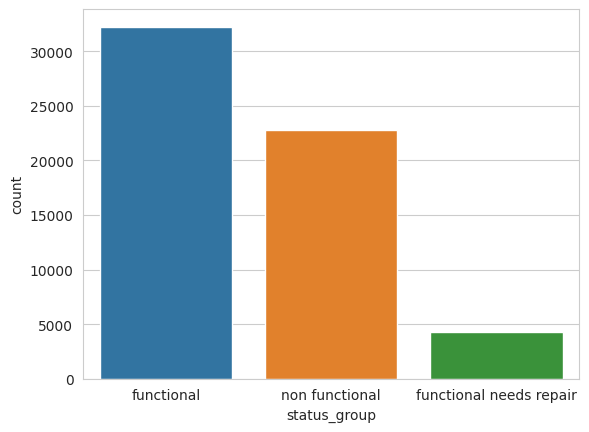

In [69]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='status_group',data=P_SparkDF)

In [70]:
SparkDF.crosstab('status_group', 'construction_year').show()

+------------------------------+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|status_group_construction_year|    0|1960|1961|1962|1963|1964|1965|1966|1967|1968|1969|1970|1971|1972|1973|1974|1975|1976|1977|1978|1979|1980|1981|1982|1983|1984|1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|
+------------------------------+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|                    functional|10555|  24|   2|   7|  31|   7|  11|   6|

Text(0.5, 1.0, 'status_group Vs construction_year')

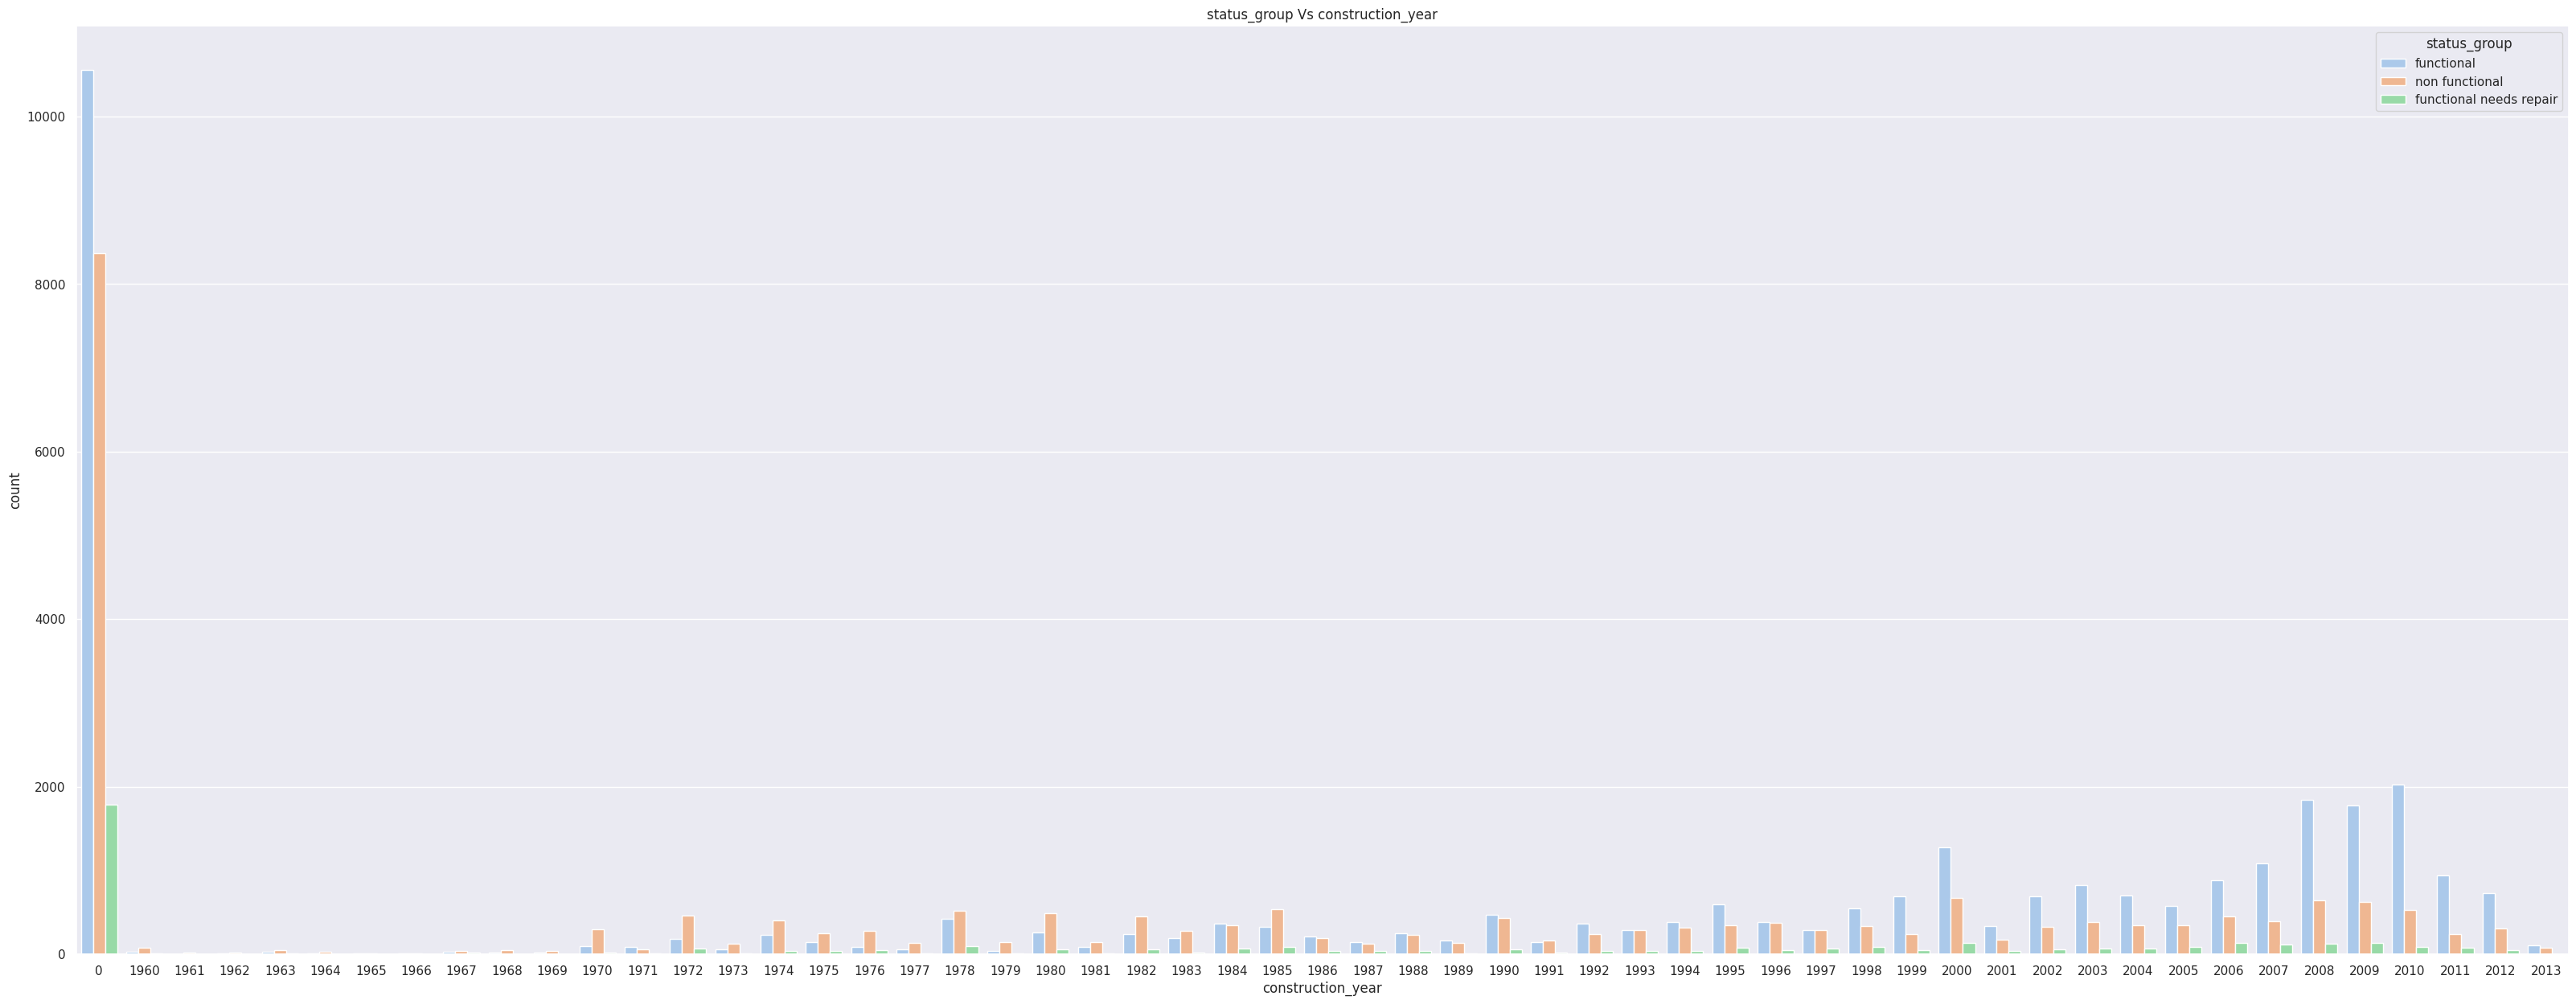

In [71]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(40,15)})
ax = sns.countplot(x=P_SparkDF['construction_year'], hue=P_SparkDF['status_group'], palette="pastel")
ax.set_title('status_group Vs construction_year')

In [72]:
SparkDF.crosstab('status_group', 'water_quality').show()

+--------------------------+--------+--------+------------------+-----+-----+---------------+-----+-------+
|status_group_water_quality|coloured|fluoride|fluoride abandoned|milky|salty|salty abandoned| soft|unknown|
+--------------------------+--------+--------+------------------+-----+-----+---------------+-----+-------+
|                functional|     246|     151|                 6|  438| 2220|            174|28760|    264|
|            non functional|     190|      36|                11|  352| 2411|             93|18154|   1577|
|      functional needs ...|      54|      13|                 0|   14|  225|             72| 3904|     35|
+--------------------------+--------+--------+------------------+-----+-----+---------------+-----+-------+



Text(0.5, 1.0, 'status_group Vs water_quality')

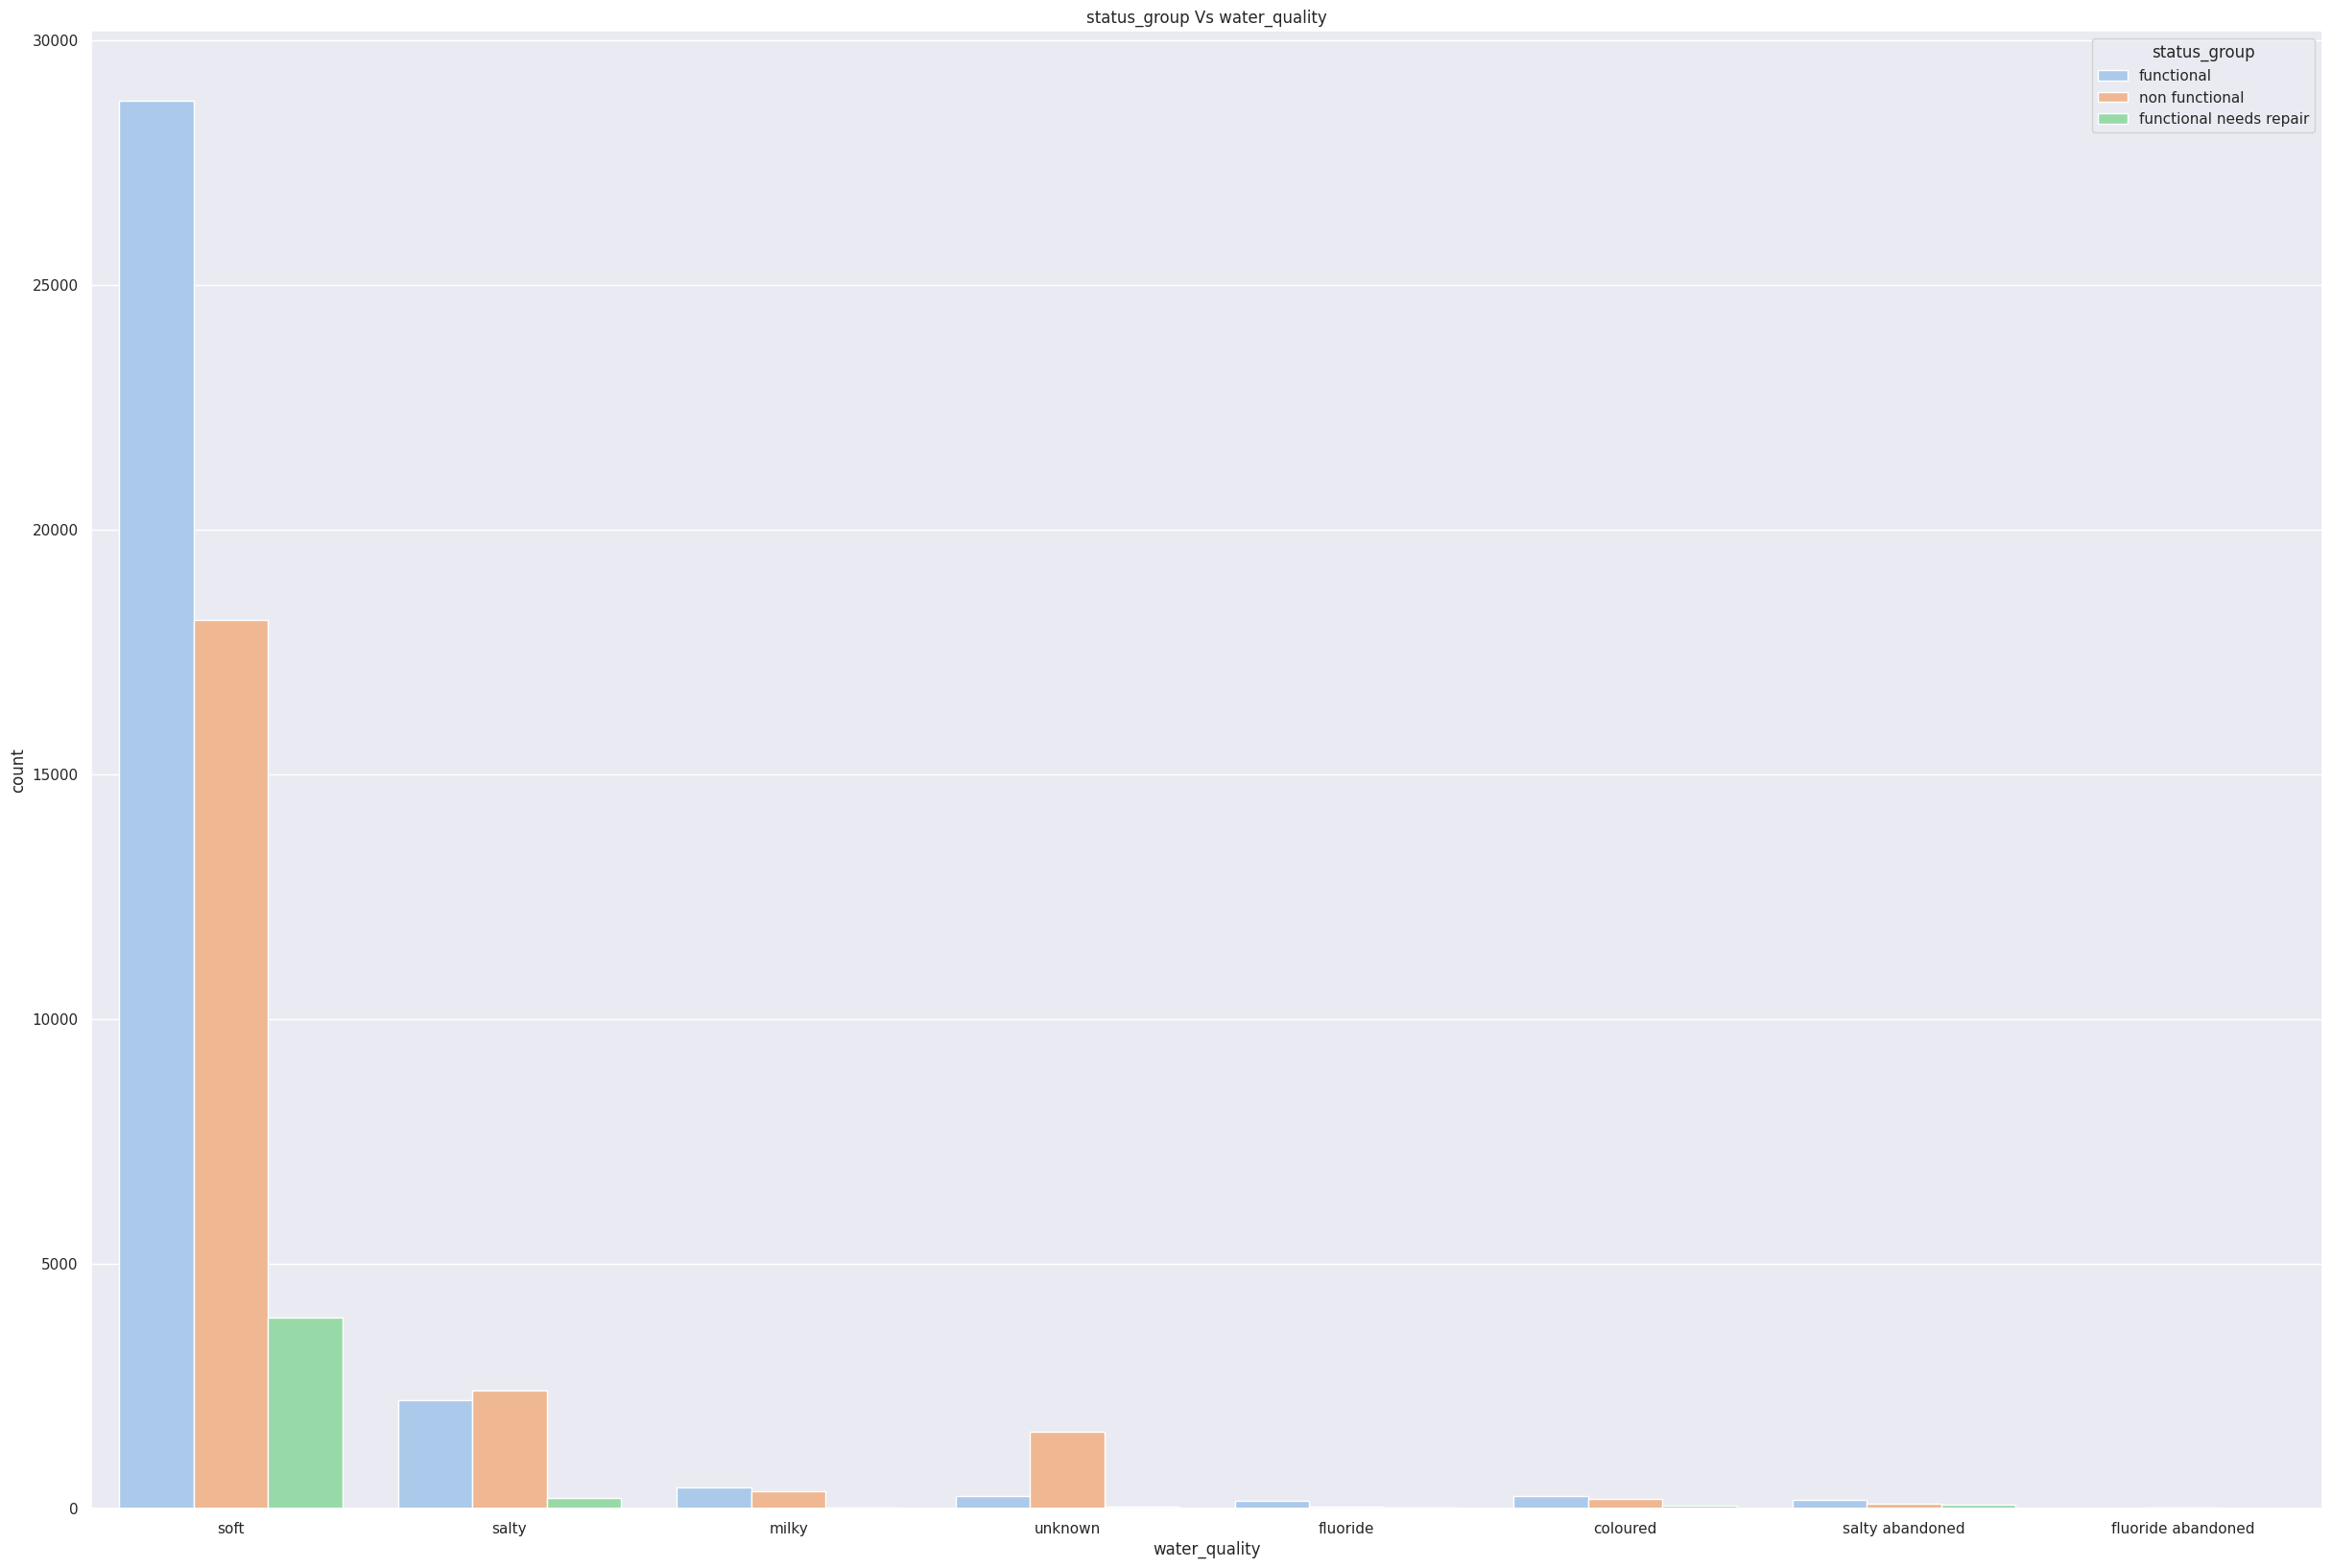

In [73]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.countplot(x=P_SparkDF['water_quality'], hue=P_SparkDF['status_group'], palette="pastel")
ax.set_title('status_group Vs water_quality')

In [74]:
SparkDF.show(2)

+-----+------------+-----+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+
|   id|status_group|   id|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_quali

In [75]:
SparkDF1 = SparkDF.withColumn('year', split(SparkDF['date_recorded'], '-').getItem(0)) \
                  .withColumn('month', split(SparkDF['date_recorded'], '-').getItem(1)) \
                  .withColumn('date', split(SparkDF['date_recorded'], '-').getItem(2))
SparkDF1.show(2)

+-----+------------+-----+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+----+-----+----+
|   id|status_group|   id|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_

In [76]:
SparkDF1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |--

In [77]:
SparkDF1 = SparkDF1.withColumn("public_meeting", col("public_meeting").cast("string"))
SparkDF1 = SparkDF1.withColumn("permit", col("permit").cast("string"))

In [78]:
SparkDF1 = SparkDF1.withColumn("gps_height", col("gps_height").cast("double"))

In [79]:
SparkDF1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: double (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: string (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- p

In [80]:
SparkDF2 = SplitDF1.join(SplitDF2, ["id"])
SparkDF2.show()

+-----+--------------------+----------+-------------+--------------------+----------+--------------------+-----------+------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+
|   id|        status_group|amount_tsh|date_recorded|              funder|gps_height|           installer|  longitude|    latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|scheme_management

In [81]:
SparkDF3 = SparkDF2.withColumn('year', split(SparkDF['date_recorded'], '-').getItem(0)) \
                  .withColumn('month', split(SparkDF['date_recorded'], '-').getItem(1)) \
                  .withColumn('date', split(SparkDF['date_recorded'], '-').getItem(2))
SparkDF3.show(2)

+-----+------------+----------+-------------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+--------------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+----+-----+----+
|   id|status_group|amount_tsh|date_recorded| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|         recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_q

In [82]:
SparkDF3 = SparkDF3.withColumn("public_meeting", col("public_meeting").cast("string"))
SparkDF3 = SparkDF3.withColumn("permit", col("permit").cast("string"))
SparkDF3 = SparkDF3.withColumn("gps_height", col("gps_height").cast("double"))

In [83]:
SparkDF3.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: double (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: string (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: string (nullable = true)
 |-

In [84]:

# Find count for empty, None, Null, Nan with string literals.
from pyspark.sql.functions import col,isnan,when,count
SparkDF4 = SparkDF3.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c
                           )).alias(c)
                    for c in SparkDF3.columns])
SparkDF4.show()


+---+------------+----------+-------------+------+----------+---------+---------+--------+--------+-----------+-----+----------+------+-----------+-------------+---+----+----------+--------------+-----------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+-------+------------+-------------+-------------+--------+--------------+------+-----------+------------+---------------+---------------------+----+-----+----+
| id|status_group|amount_tsh|date_recorded|funder|gps_height|installer|longitude|latitude|wpt_name|num_private|basin|subvillage|region|region_code|district_code|lga|ward|population|public_meeting|recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|payment|payment_type|water_quality|quality_group|quantity|quantity_group|source|source_type|source_class|waterpoint_type|waterpoint_type_g

In [85]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols = ['gps_height', ],
    outputCols = ['gps_height']
).setStrategy("mean")


In [86]:
imputer.fit(SparkDF3).transform(SparkDF3).show()

# Fit the Imputer
model = imputer.fit(SparkDF3)

#Transform the dataset
SparkDF5 = model.transform(SparkDF3)

SparkDF5.show(5)

+-----+--------------------+----------+-------------+--------------------+----------+--------------------+-----------+------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+-----+----+
|   id|        status_group|amount_tsh|date_recorded|              funder|gps_height|           installer|  longitude|    latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|s

In [87]:
SparkDF6 = SparkDF5.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c
                           )).alias(c)
                    for c in SparkDF5.columns])
SparkDF6.show()

+---+------------+----------+-------------+------+----------+---------+---------+--------+--------+-----------+-----+----------+------+-----------+-------------+---+----+----------+--------------+-----------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+-------+------------+-------------+-------------+--------+--------------+------+-----------+------------+---------------+---------------------+----+-----+----+
| id|status_group|amount_tsh|date_recorded|funder|gps_height|installer|longitude|latitude|wpt_name|num_private|basin|subvillage|region|region_code|district_code|lga|ward|population|public_meeting|recorded_by|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|payment|payment_type|water_quality|quality_group|quantity|quantity_group|source|source_type|source_class|waterpoint_type|waterpoint_type_g

In [88]:
SparkDF5.show()

+-----+--------------------+----------+-------------+--------------------+----------+--------------------+-----------+------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+-----+----+
|   id|        status_group|amount_tsh|date_recorded|              funder|gps_height|           installer|  longitude|    latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|s

In [89]:
# Refering more than one column
SparkDF5.drop("id","date_recorded","recorded_by").printSchema()

root
 |-- status_group: string (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: double (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: string (nullable = true)
 |-- construction_year: integer (nullable = true)
 |-- extraction_type: string (nullable = true)
 |-- extraction_type_group: s

In [90]:
SparkDF5.na.fill("UNKNOWN",["funder","installer","subvillage","public_meeting","scheme_management","scheme_name","permit"]).show()


+-----+--------------------+----------+-------------+--------------------+----------+--------------------+-----------+------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+-----+----+
|   id|        status_group|amount_tsh|date_recorded|              funder|gps_height|           installer|  longitude|    latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|s

In [131]:
# Refering more than one column
SparkDF6 = SparkDF5.drop("id","date_recorded","recorded_by")

In [132]:
SparkDF6.show(5)

+--------------+----------+------------+----------+------------+-----------+------------+--------------------+-----------+--------------------+----------+-------+-----------+-------------+---------+----------+----------+--------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+--------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+-----+----+
|  status_group|amount_tsh|      funder|gps_height|   installer|  longitude|    latitude|            wpt_name|num_private|               basin|subvillage| region|region_code|district_code|      lga|      ward|population|public_meeting|scheme_management|         scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|       payment|payment_type

In [133]:
SparkDF7 = SparkDF6.withColumn('age', year(current_date())- SparkDF6['year'] )
SparkDF7.show(2)

+------------+----------+-------+----------+---------+-----------+-----------+--------+-----------+-------------+----------+------+-----------+-------------+---------+--------+----------+--------------+-----------------+-----------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+------------------+---------------------+----+-----+----+----+
|status_group|amount_tsh| funder|gps_height|installer|  longitude|   latitude|wpt_name|num_private|        basin|subvillage|region|region_code|district_code|      lga|    ward|population|public_meeting|scheme_management|scheme_name|permit|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|     payment|payment_type|water_quality|quality_group|    quantity|quantity_group|              source|       

In [134]:
SparkDF8 = SparkDF7.drop("longitude","latitude","year","month","date","construction_year")

In [135]:
trainDF, testDF = SparkDF8.randomSplit(weights=[0.8,0.2], seed=200)

In [136]:
trainDF.count()

47549

In [137]:
testDF.count()

11851

In [138]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["amount_tsh", "gps_height", "num_private","region_code","district_code","population","age"],
    outputCol="num_features")

In [139]:
num_assembler_out = assembler.transform(SparkDF8)

num_assembler_out.show()

+--------------------+----------+--------------------+----------+--------------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+-----------------+--------------------+------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+--------------------+
|        status_group|amount_tsh|              funder|gps_height|           installer|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|scheme_management|         scheme_name|permit|extraction_type|extraction_type_group|extraction_type_class|      management|management_group| 

In [117]:
numeric_Features = ["amount_tsh", "gps_height", "num_private","region_code","district_code","population","age"]
SparkDF8.select(numeric_Features).describe().toPandas().transpose()

0                    1                   2      3         4
summary        count                 mean              stddev    min       max
amount_tsh     59400    317.6503846801347   2997.574558142168    0.0  350000.0
gps_height     59400    668.3190894703168   693.1126683350415  -90.0    2770.0
num_private    59400  0.47414141414141414  12.236229810496676      0      1776
region_code    59400   15.297003367003366   17.58740633733204      1        99
district_code  59400    5.629747474747475   9.633648629454557      0        80
population     59400   179.90998316498317  471.48217573848063      0     30500
age            59400   11.078333333333333  0.9587575628090268   10.0      21.0

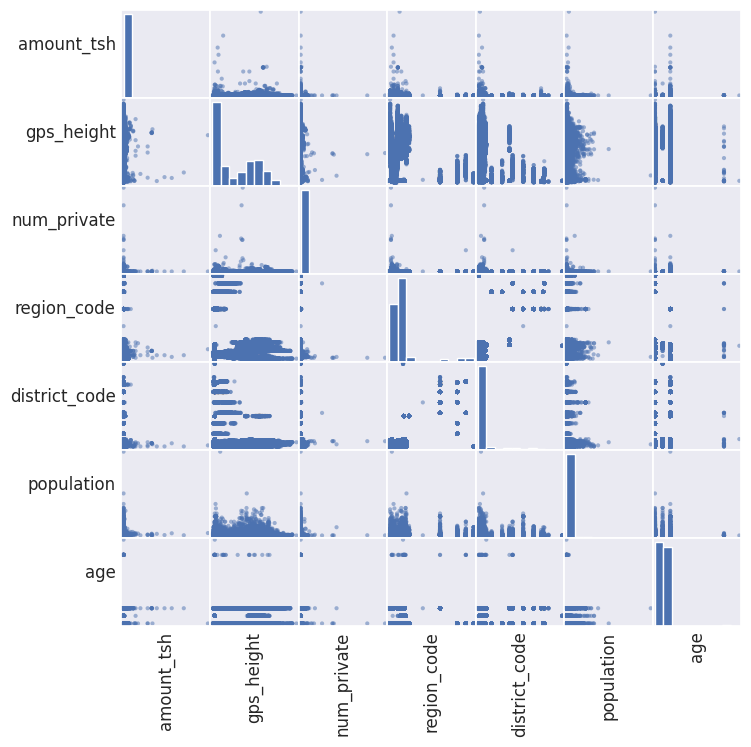

In [120]:
import pandas as pd
from pandas.plotting import scatter_matrix

numeric_data = SparkDF8.select(numeric_Features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [128]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="num_features", outputCol="scaled_num_features")
scaler_model = scaler.fit(num_assembler_out.select("num_features"))
num_scaled_out = scaler_model.transform(num_assembler_out)

num_scaled_out.show()

+--------------------+----------+--------------------+----------+--------------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+-----------------+--------------------+------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+--------------------+--------------------+
|        status_group|amount_tsh|              funder|gps_height|           installer|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|scheme_management|         scheme_name|permit|extraction_type|extraction_type_group|extraction_type_class|      manageme

In [146]:
num_scaled_out.show(3)

+------------+----------+------------+----------+------------+-----------+-----------+-------------+----------+-------+-----------+-------------+---------+--------+----------+--------------+-----------------+--------------------+------+---------------+---------------------+---------------------+----------+----------------+--------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+----+--------------------+--------------------+
|status_group|amount_tsh|      funder|gps_height|   installer|   wpt_name|num_private|        basin|subvillage| region|region_code|district_code|      lga|    ward|population|public_meeting|scheme_management|         scheme_name|permit|extraction_type|extraction_type_group|extraction_type_class|management|management_group|       payment|payment_type|water_quality|quality_group|    quantity|quantity_group|              source|         source_t

In [ ]:
SparkDF9 = num_scaled_out.drop("amount_tsh","funder","gps_height","installer","wpt_name","num_private", \
                               "basin", "subvillage","region","region_code","district_code","lga", "ward", \
                               "population", "public_meeting","scheme_management","scheme_name","permit", \
                               "extraction_type","extraction_type_group","extraction_type_class","management", \
                               "management_group", "payment", "payment_type", "water_quality", "quality_group", \
                               "quantity", "quantity_group", "source","source_type","source_class","waterpoint_type",\
                               "waterpoint_type_group", "age", "num_features")

In [130]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [142]:
categoricalColumns = ['public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'water_quality','quality_group','quantity_group', 'source_class','waterpoint_type_group']
stages = []

for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'status_group', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ["scaled_num_features"]

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [143]:
stages

[StringIndexer_8dc72a539749,
 OneHotEncoder_02b78ad32bb3,
 StringIndexer_611300324800,
 OneHotEncoder_387a5e71e1f4,
 StringIndexer_03186f3d3999,
 OneHotEncoder_412a55b9ebce,
 StringIndexer_8042499f1a23,
 OneHotEncoder_58b916dcf600,
 StringIndexer_aba98087a07c,
 OneHotEncoder_3c5a7d79355c,
 StringIndexer_48a7d73c03c4,
 OneHotEncoder_77ee96180b94,
 StringIndexer_7df08f699dc1,
 OneHotEncoder_11dcc777d587,
 StringIndexer_309a23277479,
 OneHotEncoder_90f17e387ff1,
 StringIndexer_2e4517a0daac,
 OneHotEncoder_38360f0a68ec,
 StringIndexer_d6283fb8eb8b,
 OneHotEncoder_19a8579d46f0,
 StringIndexer_43594021ff82,
 OneHotEncoder_23327b34073e,
 StringIndexer_51ab8baffc61,
 VectorAssembler_b6bf9a0b2f8f]

In [145]:
from pyspark.ml import Pipeline
cols = num_scaled_out.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(num_scaled_out)
df = pipelineModel.transform(num_scaled_out)
selectedCols = ['label', 'features'] + cols
num_scaled_out = num_scaled_out.select(selectedCols)
num_scaled_out.printSchema()

AnalysisException: ignored